# Blatt 9

## Aufgabe 1) Fehlerfortpflanzung

* Ausgleichsgerade $y = a_0 + a_1 x$ mit Parametern $a_0 = 1.0 \pm 0.2$ und $a_1 = 1.0 \pm 0.2$

* Korrelationskoeffizient $\rho = -0.8$

Unsicherheit eines Wertes $y$ bestimmen:

### a) analytisch

$\bar{y} = \bar{a_0} + \bar{a_1} x$



* Ohne Berücksichtigung der Korrelation

$\sigma_y = \sqrt{\left(\frac{\partial y}{\partial a_0} \sigma_{a_0}\right)^2 + \left(\frac{\partial y}{\partial a_1} \sigma_{a_1}\right)^2} = \sqrt{\sigma_{a_0}^2 + x^2 \sigma_{a_1}^2} = 0.2 \cdot \sqrt{1+x^2}$


* Mit Berücksichtigung der Korrelation

$\sigma_y = \sqrt{\left(\frac{\partial y}{\partial a_0} \sigma_{a_0}\right)^2 + \left(\frac{\partial y}{\partial a_1} \sigma_{a_1}\right)^2 + 2 \frac{\partial y}{\partial a_0} \frac{\partial y}{\partial a_1} cov(a_0, a_1)}$

mit $\rho = \frac{cov(a_0, a_1)}{\sigma_{a_0} \sigma_{a_1}} \Rightarrow cov = \rho \sigma_{a_0} \sigma_{a_1}$

$\sigma_y = \sqrt{\sigma_{a_0}^2 + x^2 \sigma_{a_1}^2 - 2 x \rho \sigma_{a_0} \sigma_{a_1}} = \sqrt{0.04 + 0.04 x^2 - 0.064 x} = 0.2 \cdot \sqrt{x^2 - 1.6 x +1}$

### b) numerisch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

b)


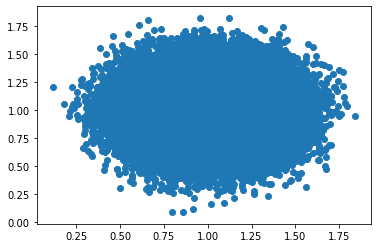

c)
Für x = -3.0:
	 Numerisch: 	y = -1.99661 +/- 0.633159.
	 Analytisch: 	y = -2.0 +/- 0.632456.

Für x = 0.0:
	 Numerisch: 	y = 0.999618 +/- 0.200724.
	 Analytisch: 	y = 1.0 +/- 0.2.

Für x = 3.0:
	 Numerisch: 	y = 3.99584 +/- 0.632721.
	 Analytisch: 	y = 4.0 +/- 0.632456.



In [3]:
def f(x, a0, a1):
    return a0 + x* a1

ana_y =np.array([[-3, 0, 3],[-2, 1, 4], [0.632456, 0.2, 0.632456]]).T
x = [-3, 0, 3]
a0 = np.random.normal(1.0, 0.2, 10**5)
a1 = np.random.normal(1.0, 0.2, 10**5)

print("b)")
plt.scatter(a0, a1)
plt.show()
print("c)")
for i in ana_y:
    y = f(i[0], a0, a1)
    y_mean= y.mean() 
    y_std = y.std()
    print(f"Für x = {i[0]}:\n\t Numerisch: \ty = {y_mean:.6} +/- {y_std:.6}.\n\t Analytisch: \ty = {i[1]} +/- {i[2]}.\n")
    
None

## Nr. 4

In [10]:
import uncertainties.unumpy as unp 
from uncertainties import ufloat

In [13]:
def func1(psi):
    return np.cos(psi)

def func2(psi):
    return np.sin(psi)

psi = np.linspace(0,330, 12)
y = np.array([-0.032,  0.010,  0.057, 0.068 , 0.076,  0.080, 0.031 , 0.005, -0.041, -0.090, -0.088, -0.074])
sigma2 = 0.011**2
A = np.array([func1(psi), func2(psi)]).T

print("a) A: \n", A)
a = np.linalg.inv(A.T @ A) @ A.T @ y

print("b) a:\n", a)
Vy = sigma2 * np.eye(len(y))

Va = np.linalg.inv(A.T @ A) @ A.T @ Vy @ A @ np.linalg.inv(A.T @ A)
print("c) V[a]: \n", Va, "\n")
sigmaa1 = np.sqrt(Va[0,0])
sigmaa2 = np.sqrt(Va[1,1])
korr = Va[0,1]

print(f" Der Fehler von a1 ist {sigmaa1:.2e}, von a2 {sigmaa2:.2e} und der Korrelationskoeffizient ist {korr:.2e}.")


a1 = ufloat(a[0], sigmaa1)
a2 = ufloat(a[1], sigmaa2)


delta = unp.arctan(-a2/a1)
print(f" Der Wert delta ergibt sich zu delta={delta}.")
A = a1/unp.cos(delta)
print(f" Der Wert A ergibt sich zu A={A}.")

a) A: 
 [[ 1.          0.        ]
 [ 0.15425145 -0.98803162]
 [-0.95241298 -0.30481062]
 [-0.44807362  0.89399666]
 [ 0.81418097  0.58061118]
 [ 0.69925081 -0.71487643]
 [-0.59846007 -0.80115264]
 [-0.88387747  0.46771852]
 [ 0.32578131  0.94544515]
 [ 0.98438195 -0.17604595]
 [-0.02209662 -0.99975584]
 [-0.99119882 -0.13238163]]
b) a:
 [-0.00738765  0.01328259]
c) V[a]: 
 [[ 1.86721276e-05 -2.17340331e-07]
 [-2.17340331e-07  2.19267708e-05]] 

 Der Fehler von a1 ist 4.32e-03, von a2 4.68e-03 und der Korrelationskoeffizient ist -2.17e-07.
 Der Wert delta ergibt sich zu delta=1.06+/-0.29.
 Der Wert A ergibt sich zu A=-0.015+/-0.005.
